<a href="https://colab.research.google.com/github/KimJisanER/MedBioPha/blob/main/22_1_09_Cirrhosis_class_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
import seaborn as sns

In [3]:
path = '/content/drive/MyDrive/cirrho/cirrhosis.csv'

data=pd.read_csv(path)

pd.set_option('display.max_columns',25)

print(data.head())

   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2  

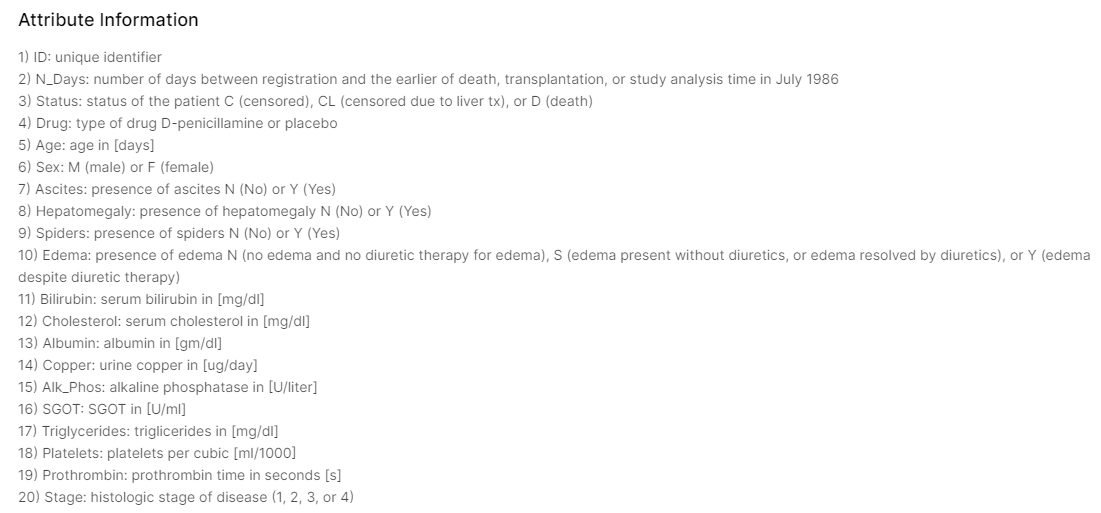

#EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

 Drug, Ascites,Hepatomegaly,Spiders, Cholesterol, Copper, Alk_Phos,SGOT, Tryglicerides, Platelets, Prothrombin, Stage 컬럼에 결측치 존재

In [5]:
X_train=data.drop(columns=['ID','Stage'])
y_train=data['Stage']

범주형데이터

In [9]:
X_train['Status'].value_counts()

C     232
D     161
CL     25
Name: Status, dtype: int64

In [10]:
X_train['Drug'].value_counts()

D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64

D-penicillamine은 윌슨병에 쓰이는 약제임.


윌슨병: 간이 과다한 구리를 담즙으로 배출하지 못하므로 간에 구리가 축적되어 간이 손상되는 유전질환

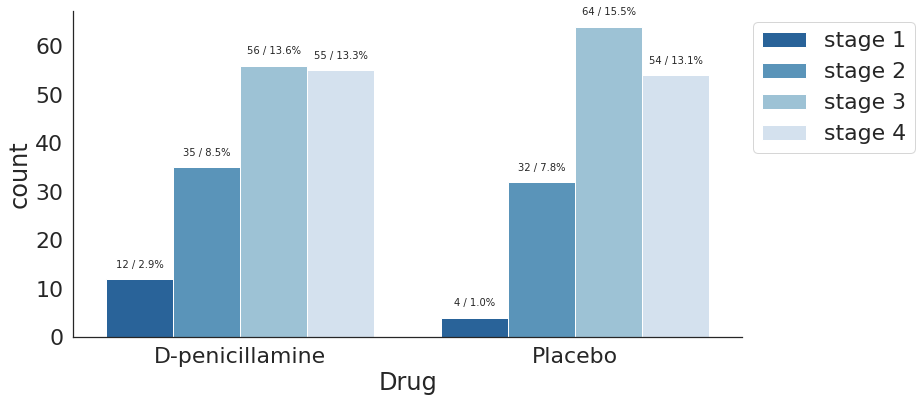

In [15]:
labels = ['stage 1','stage 2','stage 3', 'stage 4']

total_cnt = data['Stage'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=data, x='Drug',hue='Stage',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 3, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=10)
plt.legend(labels=labels,bbox_to_anchor=(1, 1))
sns.despine()

In [11]:
X_train['Sex'].value_counts()

F    374
M     44
Name: Sex, dtype: int64

남,녀 데이터 수가 매우 불균형적임.

Child-Pugh 간경변증 분류기준 및 점수체계

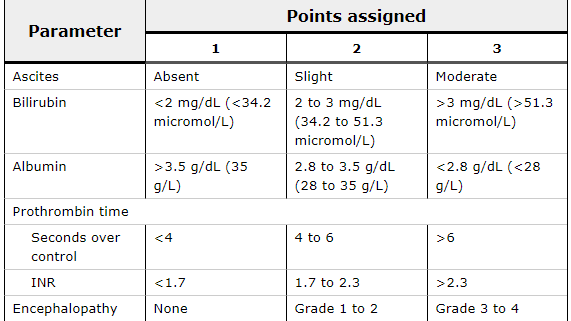

간경변증의 중증도를 분류하고 환자의 장기 생존율과 예후를 예측하는데 활용되는 Child-Pugh 분류이다. 분류체계 parameter의 대부분이 attribute에 포함되어 있으며,
중증도와 높은 corr을 갖을 것이다.

In [12]:
X_train['Ascites'].value_counts()

N    288
Y     24
Name: Ascites, dtype: int64

복수의 중증도가 간경변증중증도의 척도이나 이 데이터에서는 N,Y로만 되어있다.

In [15]:
X_train['Hepatomegaly'].value_counts()

Y    160
N    152
Name: Hepatomegaly, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


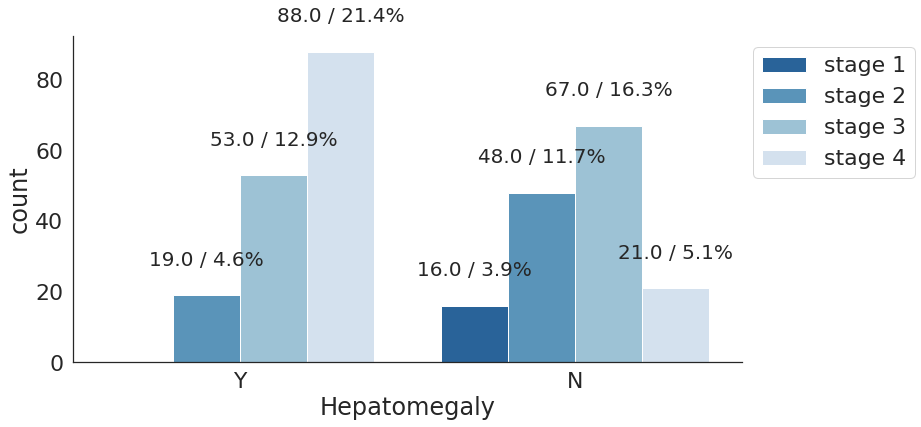

In [4]:
labels = ['stage 1','stage 2','stage 3', 'stage 4']

total_cnt = data['Stage'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=data, x='Hepatomegaly',hue='Stage',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels,bbox_to_anchor=(1, 1))
sns.despine()

간비대(Hepatomegaly): 간경변증의 임상증상 중 하나



중증도가 높은 경향이 있는 것을 확인할 수 있다.

In [16]:
X_train['Spiders'].value_counts()

N    222
Y     90
Name: Spiders, dtype: int64

거미상 혈관종(spider angiomata): 간경변증의 임상증상 중 하나

In [17]:
X_train['Edema'].value_counts()

N    354
S     44
Y     20
Name: Edema, dtype: int64

부종(Edema)은 간경변에 의해 나타날 수 있고 Y의 경우 이뇨제 투여 후에도 조절되지 않았으므로 중증도가 높다.

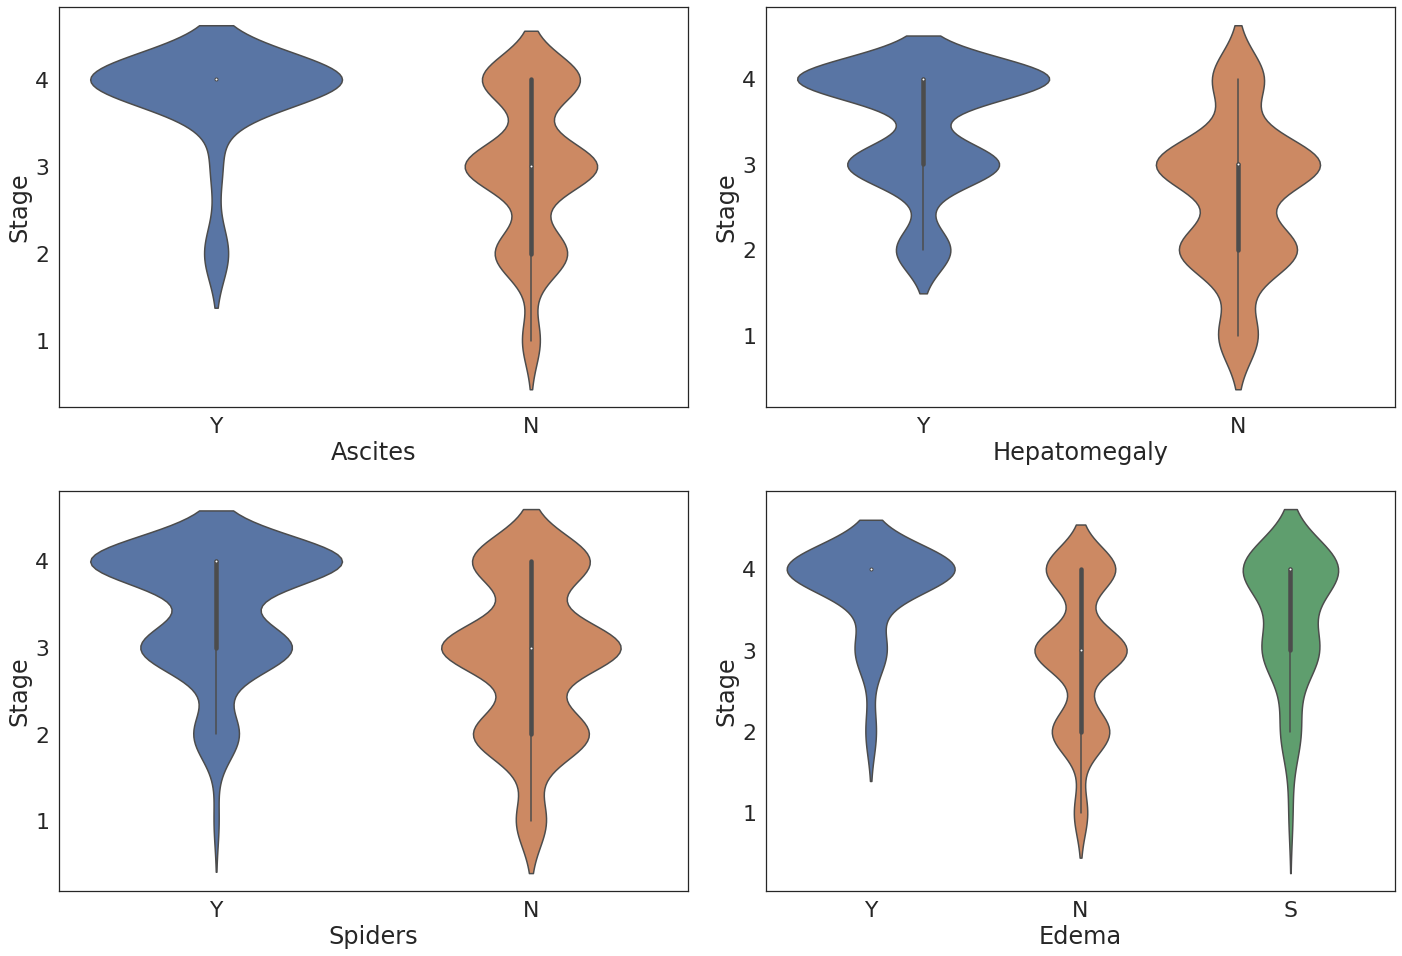

In [8]:
discrete_names=['Ascites','Hepatomegaly','Spiders', 'Edema',]

plt.figure(figsize=(20,15))

for i in range(len(discrete_names)):
    plt.subplot(2,2,i+1)
    plt.xlabel(discrete_names[i])
    plt.ylabel('Stage')
    sns.violinplot(x= data[discrete_names[i]], y= data['Stage'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

데이터에서도 'Ascites','Spiders', 'Edema' 증상이 있을경우 간경화의 stage가 높아지는 상관관계가 있는 것이 관측되었다.

In [ ]:
X_train=X_train.drop(columns='Sex','Drug',)


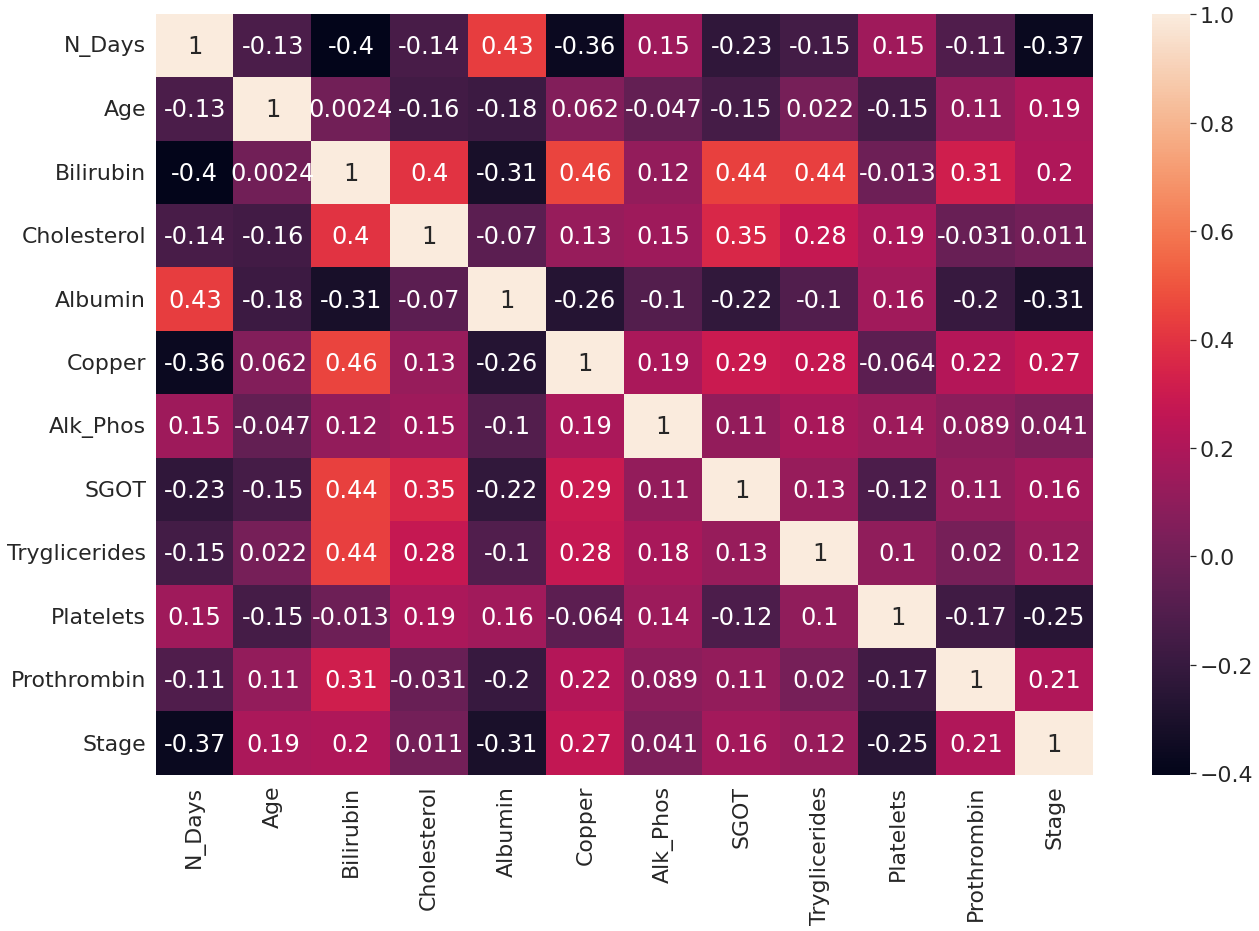

In [37]:
plt.figure(figsize=(21,14))
ax = sns.heatmap(data.drop(columns=['ID',discrete_names]).corr(), annot=True)
plt.show()

연속형변수 중에서는 생존기간(N_Days), Albumin, Platelet은 유의미한 음의 상관관계를 갖고

Age, Bilirubin,Copper,Prothrombin time 등이 양의 상관관계를 갖는 것을 볼수 있다.

간경화의 Stage가 높아질 수록 생존기간이 짧아지고 생산되는 Albumin, Platelet이 적어지므로 예상과 데이터가 일치한다.

간기능이 좋지 않을수록 빌리루빈 수치가 높아지고 prothrombine time이 길어지므로 예상과 데이터가 일치한다.

EDA 후 작업은 data 수도 적고 결측치도 많아서 중단. 더 적당한 데이터셋 있는지 찾아볼 예정